# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

C:\Users\Chrishan\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Execute GET request for BTC, format as raw JSON file, store response
btc_data = requests.get(btc_url).json()

# Execute GET request for ETH, format as raw JSON file, store response
eth_data = requests.get(eth_url).json()

In [6]:
# Print JSON BTC Data
print(json.dumps(btc_data, indent = 3))

{
   "data": {
      "1": {
         "id": 1,
         "name": "Bitcoin",
         "symbol": "BTC",
         "website_slug": "bitcoin",
         "rank": 1,
         "circulating_supply": 18660381,
         "total_supply": 18660381,
         "max_supply": 21000000,
         "quotes": {
            "USD": {
               "price": 57608.0,
               "volume_24h": 58574319180,
               "market_cap": 1074416559650,
               "percentage_change_1h": 0.213048215831103,
               "percentage_change_24h": -3.16664003202241,
               "percentage_change_7d": -6.04676276181132,
               "percent_change_1h": 0.213048215831103,
               "percent_change_24h": -3.16664003202241,
               "percent_change_7d": -6.04676276181132
            },
            "CAD": {
               "price": 72079.1296,
               "volume_24h": 73288188158.016,
               "market_cap": 1344309999434.08,
               "percent_change_1h": 0.213048215831103,
              

In [7]:
# Fetch BTC price
btc_price = btc_data["data"]['1']['quotes']['CAD']['price']
print(btc_price)

72079.1296


In [8]:
# Print JSON ETH Data
print(json.dumps(eth_data, indent = 3))

{
   "data": {
      "1027": {
         "id": 1027,
         "name": "Ethereum",
         "symbol": "ETH",
         "website_slug": "ethereum",
         "rank": 2,
         "circulating_supply": 115144426,
         "total_supply": 115144426,
         "max_supply": 0,
         "quotes": {
            "USD": {
               "price": 1800.39,
               "volume_24h": 31528194734,
               "market_cap": 207269731665,
               "percentage_change_1h": 0.284445492573504,
               "percentage_change_24h": -2.94018371286241,
               "percentage_change_7d": -6.60549884279903,
               "percent_change_1h": 0.284445492573504,
               "percent_change_24h": -2.94018371286241,
               "percent_change_7d": -6.60549884279903
            },
            "CAD": {
               "price": 2252.647968,
               "volume_24h": 39448077251.1808,
               "market_cap": 259335888259.248,
               "percent_change_1h": 0.284445492573504,
          

In [9]:
# Fetch ETH price
eth_price = eth_data["data"]['1027']['quotes']['CAD']['price']
print(eth_price)

2252.647968


In [10]:
# Compute current value of my crypto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $86494.96
The current value of your 5.3 ETH is $11939.03


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version="v2")

In [13]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [14]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [15]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]
df_closing_prices.index = df_closing_prices.index.date
df_closing_prices.head()

,AGG,SPY
2021-03-19,113.5,389.5


In [16]:
# Print AGG and SPY close prices
agg_close_price = df_closing_prices["AGG"][0]
spy_close_price = df_closing_prices["SPY"][0]
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [17]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_cryptos = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value
df_savings = pd.DataFrame(index = ['crypto', 'shares'])
df_savings['amount'] = [total_cryptos, total_shares]

# Display savings DataFrame
display(df_savings)

,amount
crypto,98433.98975
shares,42175.00000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

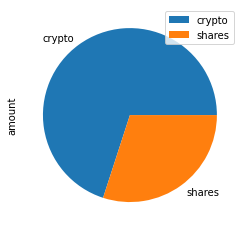

In [19]:
# Plot savings pie chart
df_savings.plot(kind = "pie", subplots = True)

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_cryptos + total_shares

# Validate savings health
if total_savings > emergency_fund:
    print("Congratulations! You have more than enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! Your total savings equal your emergency fund goal.")
else:
    print(f"Sorry! Your total savings are less than your emergency fund goal.  You need to save ${emergency_fund - total_savings:0.2f} to reach your goal.")

Congratulations! You have more than enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207  342.13   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038  339.76   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671  332.10   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602  326.91   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417  328.28   

                                                                 
                               high     low    close     volume  
time                                                             
2020-10-26 00:00:00-04:00  342.9800  335.62  339.415   79491839  
2020-10-27 00:00:00-04:00  340.1200  337.99  338.250   50634843  
2020-10-28 00:00:00-04:00  338.2483  326.13  326.670  107939571  
2020-10-29 00:00:00-04:00  333.3950  325.09  329.990   74362731  
2020-10-30 00:00:00-04:00  329.6900  322.60  326.530   93413096

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002635,1.017169,0.997790,0.992015,1.000335,1.002840,0.998072,0.994920,0.990040,1.001358,...,0.996811,0.993612,1.006056,1.003710,1.002896,1.006240,0.998210,1.005386,1.001753,0.994458
2,1.009951,1.022698,1.003419,0.983643,1.003454,1.008924,0.999038,0.984301,0.990535,1.002333,...,0.994790,0.996709,1.013474,0.998613,1.006267,1.007601,0.991067,1.018291,1.000505,0.987317
3,1.010672,1.023303,1.007098,0.987682,1.010076,1.000668,1.003508,0.986049,0.979947,0.994877,...,0.990068,0.985009,1.008719,1.000289,1.009350,1.013627,0.992575,1.027960,1.001952,0.985406
4,1.002110,1.024476,1.001086,0.985827,1.005608,1.005750,1.008755,0.978689,0.980249,1.008927,...,0.985586,0.981296,1.002846,0.996930,1.008778,1.020860,0.986507,1.031170,0.998626,0.989022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,221.932435,194.696358,111.064525,284.201921,466.813759,174.905927,122.076920,193.878003,144.339010,236.361000,...,404.730248,191.982698,178.224396,59.184522,128.547796,133.643379,228.357370,208.319496,141.918745,186.310905
7557,221.854803,196.122160,111.492298,283.619802,468.282312,177.006402,121.594000,195.062175,143.422082,235.798163,...,402.002388,191.214091,177.558475,59.133288,127.949390,133.064645,228.897002,209.595067,139.887446,187.014723
7558,221.257986,196.101743,112.373616,286.330723,469.538335,177.994691,122.583657,194.989373,144.092913,235.150213,...,398.821923,191.563989,176.880052,59.519424,126.904870,132.844182,229.974320,208.555024,140.137546,188.447007
7559,222.865448,197.316888,112.778471,285.996911,472.375611,178.248205,122.849253,196.549575,143.646523,234.829755,...,396.247427,191.996465,177.141236,59.949858,127.571825,135.484557,229.256295,209.188573,139.776852,190.004526


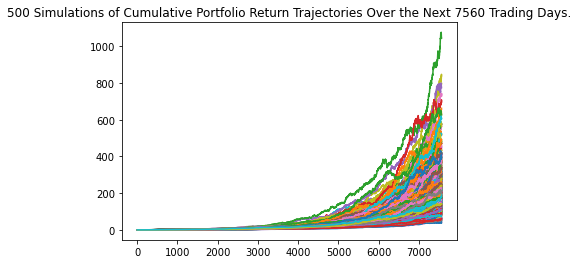

In [26]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

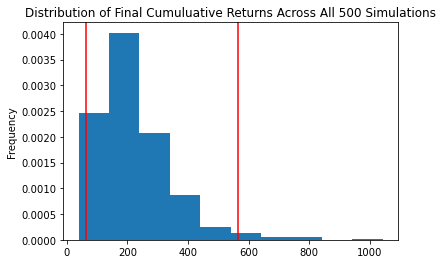

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count            500.000000
mean             225.688064
std              127.066130
min               38.731023
25%              139.501499
50%              196.729495
75%              281.655017
max             1043.350977
95% CI Lower      63.880682
95% CI Upper     563.687273
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will be within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will be within the range of $1277613.65 and $11273745.46


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
increased_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
increased_ci_lower = round(tbl[8]*increased_initial_investment,2)
increased_ci_upper = round(tbl[9]*increased_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${increased_initial_investment} in the portfolio"
      f" over the next 30 years will be within the range of"
      f" ${increased_ci_lower} and ${increased_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will be within the range of $1916420.47 and $16910618.19


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns. Higher stock than bond ratio, same initial investment amount.
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.1,.9],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002788,0.988873,0.994505,1.013560,1.001543,1.003315,0.998221,1.017891,0.995694,0.988345,...,1.008199,0.998191,0.987952,1.003669,1.002691,0.992408,1.009058,1.006018,0.992704,0.993353
2,0.990095,0.980517,1.002575,1.021621,0.995051,1.004105,0.997350,1.012446,1.003721,0.982026,...,1.008415,0.991933,1.006582,1.007996,1.019893,0.986492,1.002843,1.003858,0.981590,0.982493
3,0.974731,0.974235,1.007336,1.020416,0.984493,1.025610,0.995923,1.014290,1.012046,0.974872,...,1.013867,1.001620,1.024968,1.013450,1.032321,0.977875,1.006042,0.994850,0.987657,0.995154
4,0.967664,0.972715,1.000115,1.028486,0.989436,1.035800,0.979217,1.018078,0.998203,0.982521,...,1.023943,1.005200,1.023573,0.993122,1.047871,0.978713,1.014298,1.007230,0.988202,0.994665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,5.457556,4.376672,4.089968,5.271544,4.709813,9.928639,2.855606,6.818792,4.415369,5.147323,...,3.193484,9.341739,4.149656,4.711306,4.178451,4.272521,5.287116,3.222559,2.830332,4.123525
1257,5.499926,4.347351,4.030444,5.225102,4.668936,9.865585,2.861888,6.850343,4.416571,5.039909,...,3.203776,9.175677,4.161972,4.731696,4.118982,4.295633,5.355691,3.240409,2.881575,4.093743
1258,5.438177,4.386581,4.042686,5.315452,4.695734,9.865715,2.790003,6.832338,4.415608,5.031613,...,3.212998,9.152552,4.217059,4.758002,4.170771,4.276585,5.349502,3.322712,2.854151,4.066230
1259,5.529733,4.334089,4.021697,5.246185,4.742923,10.040703,2.809222,6.894073,4.404166,5.037725,...,3.131863,9.098350,4.220492,4.852662,4.171654,4.217568,5.376264,3.275063,2.881447,4.121953


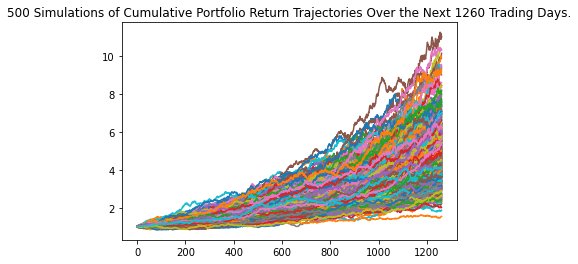

In [33]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

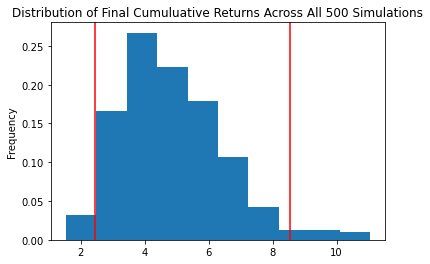

In [34]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              4.867053
std               1.598246
min               1.534252
25%               3.686401
50%               4.642996
75%               5.885641
max              11.044776
95% CI Lower      2.449804
95% CI Upper      8.532449
Name: 1260, dtype: float64


In [36]:
# Set initial investment
initial_investment_five = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will be within the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will be within the range of $48996.08 and $170648.98


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns. Higher stock than bond ratio, same initial investment amount.
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.1,.9],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994764,1.010955,1.004720,0.992382,0.983009,0.995539,1.008189,0.996497,1.008072,1.001798,...,0.996944,1.001311,0.988211,0.984953,1.007974,0.994991,0.998858,1.003714,1.003534,1.010459
2,0.984435,1.021353,1.019730,0.993727,0.995582,0.997610,1.011939,1.008698,1.003984,1.004351,...,0.988894,1.003309,0.994616,0.984962,1.016111,0.990672,0.982443,1.012938,1.005799,1.007663
3,0.966539,1.021538,1.016568,0.993236,0.990323,1.007382,1.014228,1.015111,1.004230,1.005477,...,0.994597,0.997198,0.994619,0.980039,1.020093,0.984008,1.001817,1.008133,1.000511,1.017356
4,0.974346,1.013023,1.014865,0.984945,0.987853,1.016166,1.002996,1.011314,1.017363,1.009707,...,0.984621,1.007368,0.997346,0.978459,1.031725,0.973647,1.016386,1.017380,0.981933,1.028216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,12.825937,22.114166,31.011107,17.749665,20.325075,36.462258,19.007488,14.242510,12.201829,24.983758,...,23.635899,27.498943,22.331011,13.429827,38.552856,12.840689,27.601670,30.334343,18.265690,60.303124
2517,13.023052,22.410286,31.231642,17.925052,20.161821,36.351803,19.129849,14.300483,12.070397,24.927185,...,23.517023,27.585049,22.715677,13.746325,38.696959,12.727980,27.751932,30.280652,18.448085,59.819173
2518,13.027242,22.307694,30.932089,17.835752,20.216512,36.347047,19.450354,14.488174,12.138100,25.092157,...,23.600765,27.357662,22.741156,13.591281,39.072943,12.725387,27.778270,30.037316,18.205165,60.274658
2519,12.920436,22.542963,30.650787,17.783456,20.092365,36.698449,19.558047,14.486714,12.461429,25.375390,...,23.631780,27.334201,22.796330,13.628989,39.488514,12.554453,27.568236,29.846777,18.000615,60.822376


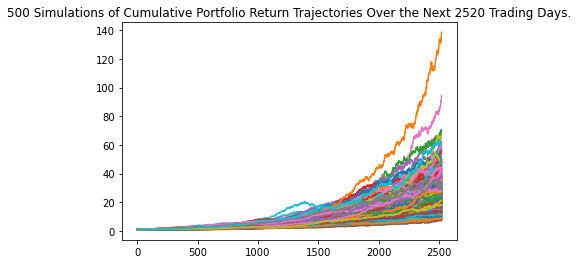

In [39]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

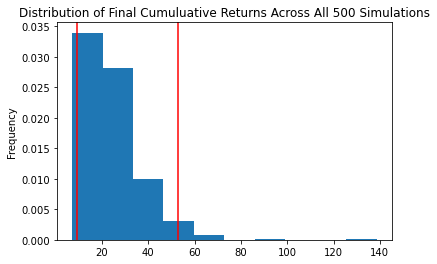

In [40]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean             24.489674
std              12.551536
min               7.195257
25%              16.134841
50%              21.904538
75%              29.442766
max             138.565734
95% CI Lower      9.273578
95% CI Upper     53.053996
Name: 2520, dtype: float64


In [42]:
# Set initial investment
initial_investment_ten = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will be within the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will be within the range of $185471.55 and $1061079.92
